In [162]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import statistics

import sys
sys.path.insert(0, '..')

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

%matplotlib inline

In [156]:
# dataset = 'breastCancer-full'
# dataset = 'ALL-AML-full'
# dataset = 'prostate_tumorVSNormal-full'

# dataset = 'Breast_GSE42568'
# dataset = 'Colorectal_GSE8671'
# dataset = 'Colorectal_GSE32323'
# dataset = 'Colorectal_GSE44076'
# dataset = 'Colorectal_GSE44861'
# dataset = 'Leukemia_GSE14317'
# dataset = 'Leukemia_GSE63270'
dataset = 'Leukemia_GSE71935'

n_tests = 20
n_population = 100
n_iterations = 200

models = []
for i in range(n_tests):
	filename = f'{dataset}_{i}_MinMaxSc.pkl'
	print(f'Reading test: {filename}')
	with open(f'../results-n3o-pop_{n_population}-it_{n_iterations}/{dataset}/{filename}', 'rb') as f:
		problem, params, res = pickle.load(f)
	models.append(res['model'])

Reading test: Leukemia_GSE71935_0_MinMaxSc.pkl
Reading test: Leukemia_GSE71935_1_MinMaxSc.pkl
Reading test: Leukemia_GSE71935_2_MinMaxSc.pkl
Reading test: Leukemia_GSE71935_3_MinMaxSc.pkl
Reading test: Leukemia_GSE71935_4_MinMaxSc.pkl
Reading test: Leukemia_GSE71935_5_MinMaxSc.pkl
Reading test: Leukemia_GSE71935_6_MinMaxSc.pkl
Reading test: Leukemia_GSE71935_7_MinMaxSc.pkl
Reading test: Leukemia_GSE71935_8_MinMaxSc.pkl
Reading test: Leukemia_GSE71935_9_MinMaxSc.pkl
Reading test: Leukemia_GSE71935_10_MinMaxSc.pkl
Reading test: Leukemia_GSE71935_11_MinMaxSc.pkl
Reading test: Leukemia_GSE71935_12_MinMaxSc.pkl
Reading test: Leukemia_GSE71935_13_MinMaxSc.pkl
Reading test: Leukemia_GSE71935_14_MinMaxSc.pkl
Reading test: Leukemia_GSE71935_15_MinMaxSc.pkl
Reading test: Leukemia_GSE71935_16_MinMaxSc.pkl
Reading test: Leukemia_GSE71935_17_MinMaxSc.pkl
Reading test: Leukemia_GSE71935_18_MinMaxSc.pkl
Reading test: Leukemia_GSE71935_19_MinMaxSc.pkl


In [157]:
train_acc = np.zeros((n_tests, n_iterations + 1))
train_gmean = np.zeros((n_tests, n_iterations + 1))
train_fit = np.zeros((n_tests, n_iterations + 1))
test_acc = np.zeros((n_tests, n_iterations + 1))
test_gmean = np.zeros((n_tests, n_iterations + 1))
test_fit = np.zeros((n_tests, n_iterations + 1))

for i in range(n_tests):
	train_acc[i, :] = models[i].training_accuracy.T
	train_gmean[i, :] = models[i].training_gmean.T
	train_fit[i, :] = models[i].training_fitness.T
	test_acc[i, :] = models[i].testing_accuracy.T
	test_gmean[i, :] = models[i].testing_gmean.T
	test_fit[i, :] = models[i].testing_fitness.T

Testing dataset fitness (mean): 99.3851
Testing dataset fitness (max): 99.7399
Testing dataset fitness (min): 98.7978


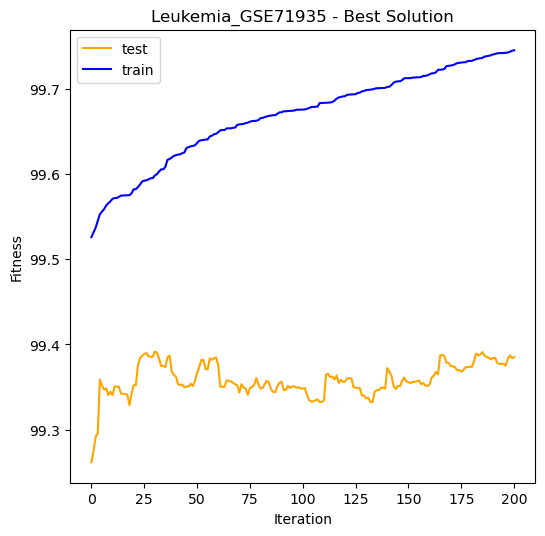

In [158]:
fig = plt.figure(figsize=(6,6), dpi= 100, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.set_title(f'{dataset} - Best Solution')
ax.set_xlabel('Iteration')
ax.set_ylabel('Fitness')

# for test in test_fit:
#     plt.plot(test[1:], color='navajowhite')

# for test in train_fit:
#     plt.plot(test[1:], color='lightblue')

plt.plot(np.mean(test_fit, axis=0), color='orange', label='test')
plt.plot(np.mean(train_fit, axis=0), color='b', label='train')

ax.legend()

print(f'Testing dataset fitness (mean): {test_fit[:,-1].mean():.4f}')
print(f'Testing dataset fitness (max): {test_fit[:,-1].max():.4f}')
print(f'Testing dataset fitness (min): {test_fit[:,-1].min():.4f}')

Testing dataset gmean (mean): 0.8250
Testing dataset gmean (max): 1.0000
Testing dataset gmean (min): 0.6429


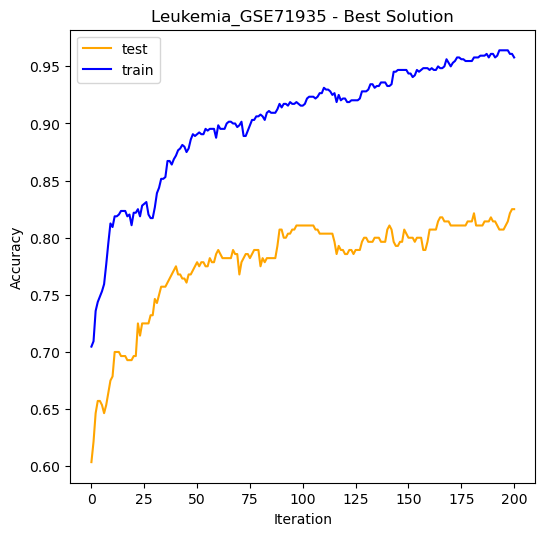

In [159]:
fig = plt.figure(figsize=(6,6), dpi= 100, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.set_title(f'{dataset} - Best Solution')
ax.set_xlabel('Iteration')
ax.set_ylabel('Accuracy')

# for test in test_acc:
#     plt.plot(test[1:], color='navajowhite')

# for test in train_acc:
#     plt.plot(test[1:], color='lightblue')

plt.plot(np.mean(test_acc, axis=0), color='orange', label='test')
plt.plot(np.mean(train_acc, axis=0), color='b', label='train')

ax.legend()

print(f'Testing dataset gmean (mean): {test_acc[:,-1].mean():.4f}')
print(f'Testing dataset gmean (max): {test_acc[:,-1].max():.4f}')
print(f'Testing dataset gmean (min): {test_acc[:,-1].min():.4f}')

Testing dataset gmean (mean): 0.6288
Testing dataset gmean (max): 1.0000
Testing dataset gmean (min): 0.0000


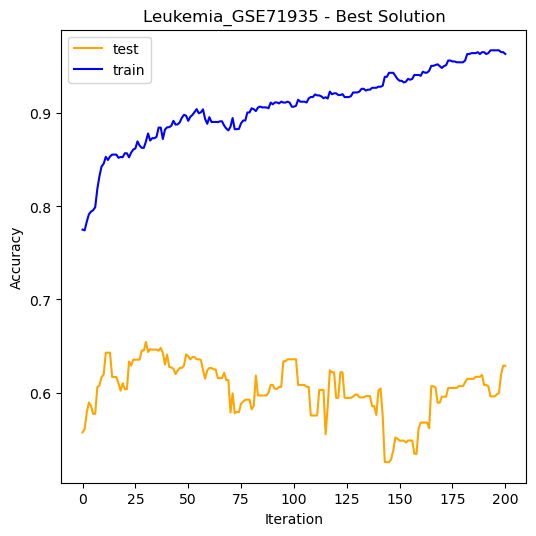

In [160]:
fig = plt.figure(figsize=(6,6), dpi= 100, facecolor='w', edgecolor='k')
ax = plt.axes()
ax.set_title(f'{dataset} - Best Solution')
ax.set_xlabel('Iteration')
ax.set_ylabel('Accuracy')

# for test in test_acc:
#     plt.plot(test, color='navajowhite')

# for test in train_acc:
#     plt.plot(test, color='lightblue')

plt.plot(np.mean(test_gmean, axis=0), color='orange', label='test')
plt.plot(np.mean(train_gmean, axis=0), color='b', label='train')

ax.legend()

print(f'Testing dataset gmean (mean): {test_gmean[:,-1].mean():.4f}')
print(f'Testing dataset gmean (max): {test_gmean[:,-1].max():.4f}')
print(f'Testing dataset gmean (min): {test_gmean[:,-1].min():.4f}')

In [161]:
g_mean = np.zeros((n_tests, 1))
features = np.zeros((n_tests, 1))
fs = np.zeros((n_tests, 1))
for i, model in enumerate(models):
	_, _, g_mean[i, 0] = model.evaluate(model.best_solution_test, model.x_test, model.y_test)
	features[i, 0] = model.x_test.shape[1]
	fs[i, 0] = model.best_solution_test.selected_features.shape[0]

fs1 = models[0].best_solution_test.selected_features
fs2 = models[1].best_solution_test.selected_features
import torch
print(fs1)
print(fs2)
print(torch.equal(fs1,fs2))

samples_train, samples_test = model.x_train.shape[0], model.x_test.shape[0]
n_samples = samples_train + samples_test
class_1 = (model.y_train.sum() + model.y_test.sum()) / n_samples
class_0 = 1 - class_1

print(f'Dataset {dataset}')
print(f"Labels: {problem['labels']}")
print(f'Proportion ({class_0:.02f}, {class_1:.02f})')
print(f'Number of samples: Total = {n_samples}, Train dataset = {samples_train}, Test dataset = {samples_test}')
print(f'Average features: {features.mean()}')
print(f'Feature selected: {fs.mean()}')
print(f'Best solution found for testing dataset')
print(f'Testing dataset gmean (mean): {g_mean.mean():.4f}')
print(f'Testing dataset gmean (std): {statistics.stdev(g_mean.squeeze()):.4f}')
print(f'Testing dataset gmean (max): {g_mean.max():.4f}')
print(f'Testing dataset gmean (min): {g_mean.min():.4f}')



tensor([1696], dtype=torch.int32)
tensor([194, 343], dtype=torch.int32)
False
Dataset Leukemia_GSE71935
Labels: {b'JMML': 0, b'normal': 1}
Proportion (0.80, 0.20)
Number of samples: Total = 46, Train dataset = 32, Test dataset = 14
Average features: 2195.8
Feature selected: 2.9
Best solution found for testing dataset
Testing dataset gmean (mean): 0.7884
Testing dataset gmean (std): 0.2066
Testing dataset gmean (max): 1.0000
Testing dataset gmean (min): 0.0000
